## EDA
### Dataset 
Data is taken from here: https://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html.

Our target labels are:
1. **Denial of Service (DoS)**: is an attack in which an adversary directed a deluge of traffic requests to a system in order to make the computing or memory resource too busy or too full to handle legitimate requests and in the process, denies legitimate users access to a machine.
2. **Probing Attack (Probe)**: probing network of computers to gather information to be used to compromise its security controls.
3. **User to Root Attack (U2R)**: a class of exploit in which the adversary starts out with access to a normal user account on the system (gained either by sniffing passwords, a dictionary attack, or social engineering) and is able to exploit some vulnerability to gain root access to the system.
4. **Remote to Local Attack (R2L)**: occurs when an attacker who has the ability to send packets to a machine over a network but who does not have an account on that machine exploits some vulnerability to gain local access as a user of that machine.

In [38]:
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import plotly.graph_objs as go

%matplotlib inline

corrected = "./data/corrected"
kddcup_data_corrected = "./data/kddcup.data.corrected"

kddcup_data_10_percent_corrected = "./data/kddcup.data_10_percent_corrected"
kddcup_testdata_10_percent = "./data/kddcup.newtestdata_10_percent_unlabeled"

correspondence = "./data/training_attack_types.txt"
header_files = "./data/headers"

In [2]:
feature_file = "./data/kddcup.names.txt"
header = []
with open(feature_file, 'r') as f:
    for line in f:
        header.append(line.split(':')[0])
header.pop(0)
header.append('classes')
print (header)

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'classes']


In [31]:
dct = dict()
with open(correspondence, "r") as f:
    for line in f:
        line = line.split()
        if line != []:
            dct[line[0]] = line[1][:-1]
dct["normal"] = "normal"

In [3]:
#print(header)
for word in header:
    print(word, end=',')

duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,classes,

In [33]:
df = pd.read_csv(kddcup_data_10_percent_corrected, header=None)
df.columns = header
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,classes
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [34]:
df.classes.value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: classes, dtype: int64

In [39]:
test_data = pd.read_csv(kddcup_testdata_10_percent, header=None)
test_data.columns = header[:-1]

In [40]:
def labels_map(label):
    """
     0 - normal
     1 - probe -  surveillance and other probing, e.g., port scanning.
     2 - dos - denial-of-service, e.g. syn flood;
     3 - u2r - unauthorized access to local superuser (root) privileges, e.g., various __buffer overflow__ attacks;
     4 - R2L - unauthorized access from a remote machine, e.g. guessing password;
    """
    label = str(label).split('.')[0]
    if label == 'normal':
        return 0
    if label in ['ipsweep', 'mscan', 'nmap', 'portsweep', 'saint', 'satan']: 
        return 1
    if label in ['apache2', 'back', 'land', 'mailbomb', 'neptune', 'pod', 'processtable', 'smurf', 'teardrop', 'udpstorm']:
        return 2
    if label in ['buffer_overflow', 'httptunnel', 'loadmodule', 'perl', 'ps', 'rootkit', 'sqlattack', 'xterm']: 
        return 3
    if label in ['ftp_write', 'guess_passwd', 'imap', 'multihop', 'named', 'phf', 'sendmail', 'snmpgetattack',
                 'snmpguess', 'spy', 'warezclient', 'warezmaster', 'worm', 'xlock', 'xsnoop']: 
        return 4
df['classes'] = df.classes.apply(labels_map)
test_data.classes = test_data.apply(labels_map)

In [42]:
df.classes.value_counts()

2    391458
0     97278
1      4107
4      1126
3        52
Name: classes, dtype: int64

**Percentage distribution of class labels in dataset**

In [43]:
rows_count = df.shape[0]
df.groupby('classes').size() * 100/rows_count

classes
0    19.691066
1     0.831341
2    79.239142
3     0.010526
4     0.227926
dtype: float64

In [44]:
df.groupby(['protocol_type'])['classes'].value_counts()

protocol_type  classes
icmp           2          281054
               0            1288
               1            1260
tcp            2          109425
               0           76813
               1            2652
               4            1126
               3              49
udp            0           19177
               2             979
               1             195
               3               3
Name: classes, dtype: int64

In [45]:
df.groupby(['classes'])['service'].value_counts()

classes  service    
0        http           61886
         smtp            9598
         private         7366
         domain_u        5862
         other           5632
         ftp_data        3798
         urp_i            537
         finger           468
         eco_i            389
         ntp_u            380
         ftp              373
         ecr_i            345
         auth             220
         telnet           219
         pop_3             79
         time              52
         IRC               42
         urh_i             14
         X11                9
         domain             3
         tim_i              2
         red_i              1
         shell              1
         ssh                1
         tftp_u             1
1        other           1506
         eco_i           1253
         private         1231
         ftp_data           8
         http               8
                        ...  
2        hostnames        102
         login     

In [46]:
X = df[df.columns[:-1]]

In [47]:
print('The number of duplicates is {}\n'.format(X.duplicated().sum()))
print('The total numer of rows is {}'.format(X.shape[0]))

The number of duplicates is 348437

The total numer of rows is 494021


In [48]:
print('The number of duplicates in test is {}\n'.format(test_data.duplicated().sum()))
print('The total numer of rows in test is {}'.format(test_data.shape[0]))

The number of duplicates in test is 233791

The total numer of rows in test is 311079


In [49]:
categorial_features = ['protocol_type','service','flag','land','logged_in','is_host_login','is_guest_login']
x_categor = X.loc[:,categorial_features]

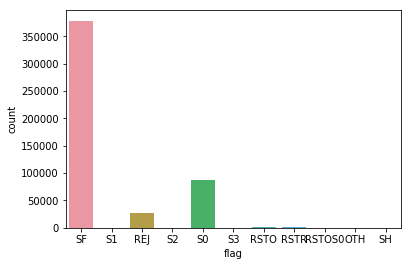

In [50]:
sns.countplot(x_categor.flag)

Can someone attack a guest profile?

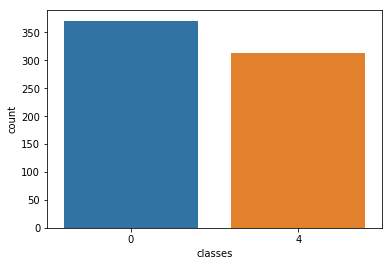

In [51]:
sns.countplot(df[(df['is_guest_login'] == 1)].classes)

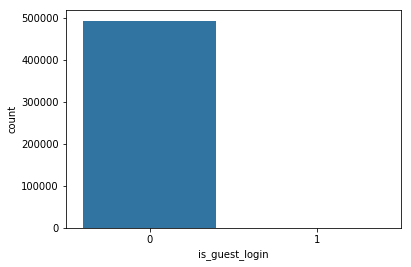

In [52]:
sns.countplot(x_categor['is_guest_login'])

Is everybody logged 

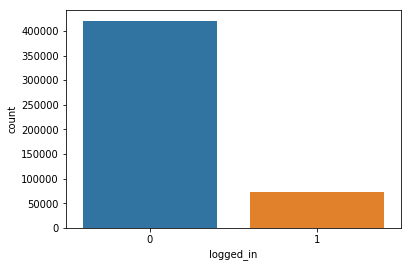

In [53]:
sns.countplot(x_categor['logged_in'])

In connection with a large number of duplicate data, we delete them.
Remove duplicate rows

In [54]:
print('rows and columns: ' + str(df.shape))
df = df.drop_duplicates()
print('rows and columns after removing duplicates:' + str(df.shape))

rows and columns: (494021, 42)
rows and columns after removing duplicates:(145585, 42)


The numbers of none values

In [55]:
len(df[df.isnull().any(axis=1)])

0

Let's try to find unnecessery columns. Features which will not impact on our prediction.

In [56]:
for col in np.array(df.columns):
    if len(df[col].unique()) == 1:
        print(col)

num_outbound_cmds
is_host_login


In [57]:
df.num_outbound_cmds.unique()

array([0])

This feature has the same value in all samples.

In [58]:
df.drop('num_outbound_cmds', axis=1,inplace=True)

### Let's see to the numerical features

In [59]:
cols=list(df.axes[1].values)
x_numerical=df.loc[:,list(set(cols).difference(set(categorial_features)))]

In [60]:
x_numerical.describe()

,src_bytes,num_compromised,num_file_creations,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,srv_diff_host_rate,same_srv_rate,dst_host_same_srv_rate,srv_rerror_rate,...,wrong_fragment,dst_host_srv_count,dst_host_srv_serror_rate,su_attempted,dst_bytes,num_root,num_shells,count,dst_host_rerror_rate,rerror_rate
count,1.455850e+05,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,...,145585.000000,145585.000000,145585.000000,145585.000000,1.455850e+05,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000
mean,7.995754e+03,0.026177,0.003675,0.061389,0.092819,0.019048,0.093080,0.655192,0.553219,0.108412,...,0.020201,129.935563,0.290980,0.000124,2.859800e+03,0.038520,0.000371,74.386097,0.110464,0.108356
std,1.820390e+06,3.311384,0.177582,0.147021,0.241112,0.060410,0.241953,0.446795,0.456236,0.308806,...,0.239369,114.714725,0.453448,0.014354,6.081000e+04,3.707506,0.020298,100.336106,0.306098,0.308962
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.080000,0.050000,0.000000,...,0.000000,12.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.470000e+02,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,1.000000,0.770000,0.000000,...,0.000000,117.000000,0.000000,0.000000,1.050000e+02,0.000000,0.000000,12.000000,0.000000,0.000000
75%,2.880000e+02,0.000000,0.000000,0.070000,0.030000,0.020000,0.000000,1.000000,1.000000,0.000000,...,0.000000,255.000000,1.000000,0.000000,1.165000e+03,0.000000,0.000000,132.000000,0.000000,0.000000
max,6.933756e+08,884.000000,28.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,255.000000,1.000000,2.000000,5.155468e+06,993.000000,2.000000,511.000000,1.000000,1.000000


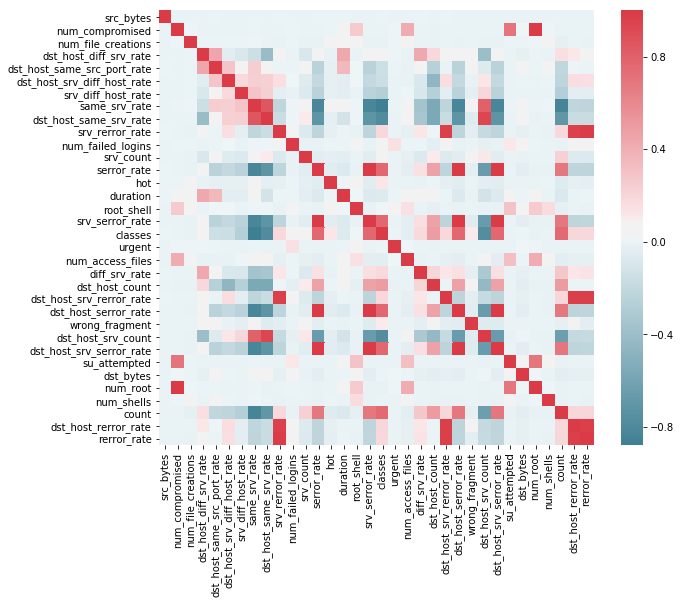

In [61]:
corr = x_numerical.corr()
f, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [63]:
pairsSet = set()

def is_only_zero_and_one(array):
    array = np.array(array.unique())
    return len(array) == 2 and ((array[0] == 0 and array[1] == 1) or ((array[0] == 1 and array[1] == 0)))

for column in x_numerical.columns:
    for inner_column in x_numerical.columns:            
        key1 = column + '-' + inner_column
        key2 = inner_column + '-' + column
        if column != inner_column and key1 not in pairsSet and key2 not in pairsSet:
            pairsSet.add(key1)
            pairsSet.add(key2)
            correlation = np.corrcoef(x_numerical[column], x_numerical[inner_column])[0, 1]
            if ((correlation >= 0.75) &  (not is_only_zero_and_one(x_numerical[column])) &  (not is_only_zero_and_one(x_numerical[inner_column]))):
                print(column + " -- " + inner_column)
                print(correlation)
                

num_compromised -- num_root
0.994214606924
same_srv_rate -- dst_host_same_srv_rate
0.858395549242
same_srv_rate -- dst_host_srv_count
0.797225997357
dst_host_same_srv_rate -- dst_host_srv_count
0.936533872979
srv_rerror_rate -- dst_host_srv_rerror_rate
0.975104747578
srv_rerror_rate -- dst_host_rerror_rate
0.967374928401
srv_rerror_rate -- rerror_rate
0.991316945228
serror_rate -- srv_serror_rate
0.996362744498
serror_rate -- classes
0.770772232832
serror_rate -- dst_host_serror_rate
0.996842722384
serror_rate -- dst_host_srv_serror_rate
0.995152089735
srv_serror_rate -- classes
0.768328078789
srv_serror_rate -- dst_host_serror_rate
0.995122418322
srv_serror_rate -- dst_host_srv_serror_rate
0.998350974928
classes -- dst_host_serror_rate
0.770825254947
classes -- dst_host_srv_serror_rate
0.769296125729
classes -- count
0.764943315286
dst_host_srv_rerror_rate -- dst_host_rerror_rate
0.971501108532
dst_host_srv_rerror_rate -- rerror_rate
0.972614186291
dst_host_serror_rate -- dst_host_srv

In [64]:
print(df.serror_rate.describe())
print(df.dst_host_srv_serror_rate.describe())
print(df.srv_serror_rate.describe())
print(df.dst_host_serror_rate.describe())
print(df.num_root.describe())
print(df.num_compromised.describe())

count    145585.000000
mean          0.291381
std           0.452904
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: serror_rate, dtype: float64
count    145585.000000
mean          0.290980
std           0.453448
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: dst_host_srv_serror_rate, dtype: float64
count    145585.000000
mean          0.291553
std           0.453567
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: srv_serror_rate, dtype: float64
count    145585.000000
mean          0.291599
std           0.452493
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: dst_host_serror_rate, dtype: float64
count    145585.000000
mean          0.038520
std           3.707506
min           0.000000
25%       

We should remove unecessery information

In [65]:
corr_column_names = ['dst_host_srv_serror_rate', 'srv_serror_rate', 'dst_host_serror_rate']
df.drop(corr_column_names, axis=1, inplace=True)

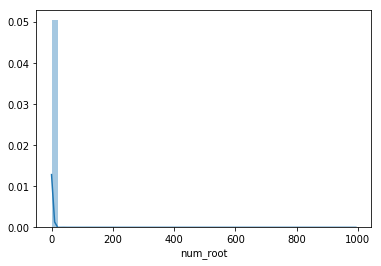

In [66]:
sns.distplot(x_numerical['num_root'])

### Translate categorial data to numeric

In [67]:
le = LabelEncoder()
need_labeling = ['protocol_type', 'service','flag']

for i in need_labeling:
    le.fit(df[i])
    df[i] = le.transform(df[i])

### **Feature selection using random forest **

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=25, random_state=42)

In [69]:
from sklearn.model_selection import train_test_split
X = df[df.columns[:-1]]
y = df['classes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=42)


In [70]:
from sklearn.preprocessing import MinMaxScaler
def do_normalization(x_train):
    cat_features = ['protocol_type','service','flag','land','logged_in','is_host_login','is_guest_login']
    cols=list(x_train.axes[1].values)
    cont_features=list(set(cols).difference(set(cat_features)))
    scaler = MinMaxScaler()
    x_train.loc[:,cont_features]=scaler.fit_transform(x_train.loc[:,cont_features])
    return x_train
X_train = do_normalization(X_train)
X_test = do_normalization(X_test)

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:517: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [71]:
X_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
359308,0.0,1,45,5,0.000000e+00,0.000000,0,0.0,0.0,0.0,...,0.06,0.00,1.000000,0.043137,0.04,0.07,0.0,0.00,0.00,0.0
140657,0.0,1,45,5,0.000000e+00,0.000000,0,0.0,0.0,0.0,...,1.00,0.00,1.000000,0.003922,0.00,1.00,0.0,0.00,0.88,0.0
463450,0.0,1,45,1,0.000000e+00,0.000000,0,0.0,0.0,0.0,...,0.07,0.00,1.000000,0.019608,0.02,0.08,0.0,0.00,1.00,1.0
77178,0.0,1,22,1,0.000000e+00,0.000000,0,0.0,0.0,0.0,...,0.00,1.00,0.003922,0.929412,1.00,0.00,1.0,0.24,1.00,1.0
486287,0.0,1,22,9,4.384348e-07,0.000114,0,0.0,0.0,0.0,...,0.00,0.17,1.000000,1.000000,1.00,0.00,0.0,0.00,0.00,0.0


In [72]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [40]:
importances=[]
for (x,y) in zip((X_train.axes[1].values),rf.feature_importances_):
    importances.append([x, y])
    
print([i[0] for i in importances])

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


37

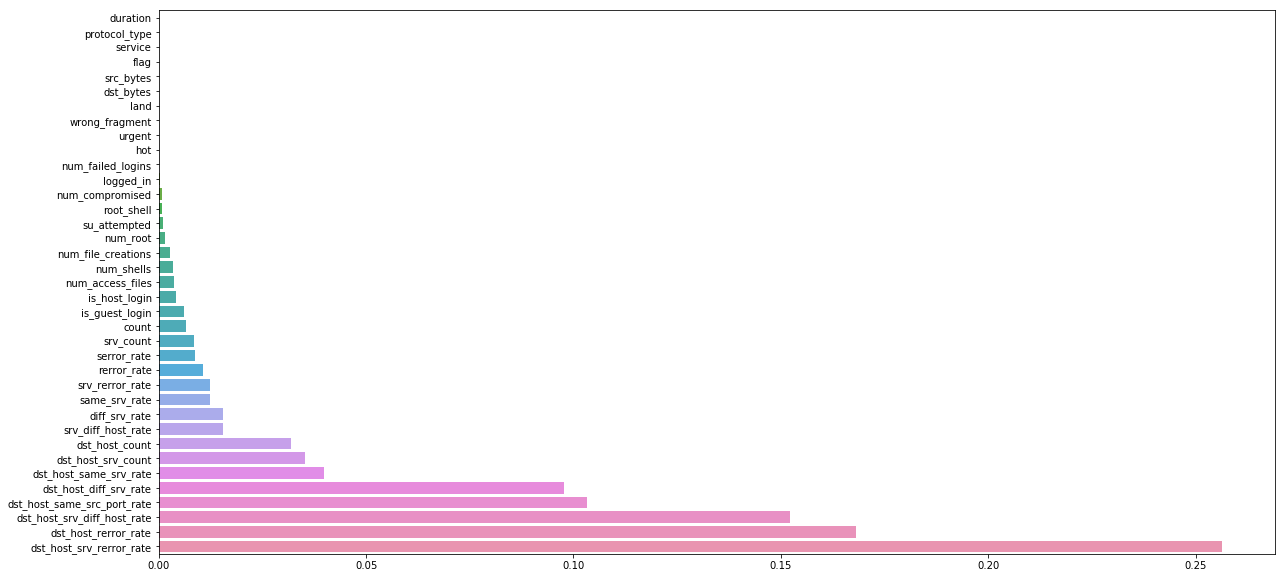

In [41]:
fig, axes = plt.subplots(figsize=(20,10))        
sns.barplot(x=np.sort([i[1] for i in importances]),y=[i[0] for i in importances])

### Save data

In [73]:
X_train.to_csv("./data/train_data")
y_train.to_csv("./data/train_labels")
X_test.to_csv("./data/test_data")
y_test.to_csv("./data/test_labels")

## Results of EDA

1. We find 1 feature that doesn't impact on target
2. 3 feature we've deleted due to high correlation 
3. Many samples had duplicate.
4. It seems that some of features are not important